## Model simulation: population model

$$\frac{dv}{dt}= r_{v}v (1-\frac{v}{K_{v}}) - d_{nv}v$$
$$\frac{dm_{1}}{dt}=r_{1}m_{1}(1-\frac{m_{1}+m_{2}}{K_{m}})-\alpha_{1}vm_{1}-d_{n1}m_{1}$$
$$\frac{dm_{2}}{dt}=r_{2}m_{2}(1-\frac{m_{1}+m_{2}}{K_{m}})-\alpha_{2}vm_{2}-d_{n2}m_{2}+m_{2,in}$$

In [1]:
# Importing python libraries
import sys
import os
import numpy as np
import scipy as sp
import pandas as pd
import math
import matplotlib.pyplot as plt
from matplotlib import ticker
%matplotlib inline

from IPython.display import Image
from ipywidgets import interact, fixed, FloatSlider, IntSlider, ToggleButtons, Label

%load_ext autoreload
%autoreload 1

# We import all of our functions prepared in advanced
sys.path.append("../functions")
%aimport general_functions
%aimport population
function_derivatives = population.model_derivatives

#Check Python version
print(sys.version)

3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]


## Model simulation

**Implementation note for advanced users**

 - We access the function ```model``` available in the script ```general_functions.py``` (that we have loaded previously) as ```general_functions.model```. 
 - This functions solves the ODEs provided by ```function_derivatives``` with given initial conditions and parameter values. 
 - The results are plotted automatically in one figure with the same axis. Everything is done when this function is called (```general_functions.model```). 
 - The results are stored (if ```returnDataFrame=True```) in a variable that we have called ```df``` (short for dataframe, which is a special data type from the ```pandas``` library which is convenient to store and manipulate data).

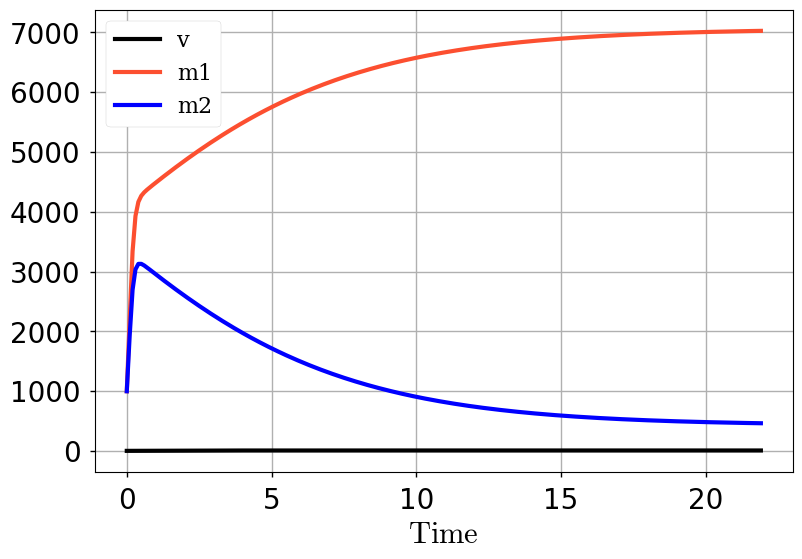

In [2]:
# Initial conditions
v_init  = 3
m1_init = 1000
m2_init = 1000 

df = general_functions.model(
    np.arange(0., 22, 0.1),     # # Time steps
    [v_init, m1_init, m2_init], # Initial conditions
    ['v','m1', 'm2'],           # Variable names
    function_derivatives,       # Function derivatives
    returnDataFrame=True, plotresults=True,
    # Specify parameter values
    r_v=1, K_v=10, K_m=8000, d_nv=0.06, d_n1=0.9, d_n2=1, r_1=14.2, r_2=12.1,
    alpha_1=0.00005, alpha_2=0.00006, m2_in=100)

plt.show()

Since $v$ has different order of magnitude compared to $m_1$ and $m_2$, it is more logic to plot $v$ on a different scale (Please note that other colors are now used).

**Implementation note**: 

- Since we have our results stored in ```df```, we will use this to plot them on a separate figure (using the ```matplotlib``` library). We access the data as ```df[name_of_the_variable]```.
- We code the following figure in pure Python for you to know how to do it (instead of creating a plotting function like before that lives in ```general_functions``` directory like we just did before).

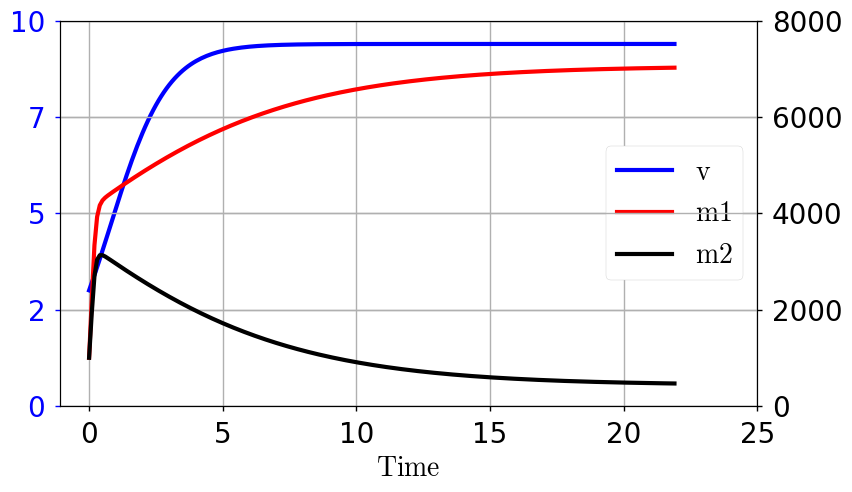

In [3]:
fig, ax = plt.subplots(figsize=(9,5))                        # We prepare a graph
ax_twin = ax.twinx()                                         # We create a double y-axis
plot = ax.plot(df['v'],label=r'$\mathrm{v}$', color='blue')  # We plot v first in blue
plot_twin1 = ax_twin.plot(df['m1'], 
             label=r'$\mathrm{m1}$', color='red');           # We plot m1 on the 'twin'-axis 
plot_twin2 = ax_twin.plot(df['m2'],
             label=r'$\mathrm{m2}$', color='black');         # We plot m2 on the 'twin'-axis

# Plotting options
ax.set_xlabel(r'$\mathrm{Time}$', fontsize=20,rotation=0)    # We create a label for the x axis
ax.yaxis.label.set_color('blue')                             # We set the v first in blue
ax.tick_params(axis='y', colors='blue')                      # We set the ticks of the y-axis in blue
ax.set(yticks=np.linspace(0,10,num=5))                       # We create custom ranges for the y-axis
ax_twin.set(yticks=np.linspace(0,8000,num=5))
ax.set(xticks=np.linspace(0,25,num=6))                       # We create custom ranges for the x-axis

# Custom formatting options using decimal notation when plotting the numbers
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%d"))
ax_twin.yaxis.set_major_formatter(ticker.FormatStrFormatter("%d"))
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter("%d"))

# These three lines is just to have legend labels when involving multiple axis
plots = plot + plot_twin1 + plot_twin2
labs = [leg.get_label() for leg in plots]
ax.legend(plots, labs, loc=5,framealpha=1)

#ax_twin.grid(False)
#ax.grid(False)

plt.show()

$$\frac{dv}{dt}= r_{v}v (1-\frac{v}{K_{v}}) - d_{nv}v$$
$$\frac{dm_{1}}{dt}=r_{1}m_{1}(1-\frac{m_{1}+m_{2}}{K_{m}})-\alpha_{1}vm_{1}-d_{n1}m_{1}$$
$$\frac{dm_{2}}{dt}=r_{2}m_{2}(1-\frac{m_{1}+m_{2}}{K_{m}})-\alpha_{2}vm_{2}-d_{n2}m_{2}+m_{2,in}$$

## Impact of initial conditions and $m_2$ migration rate

**Implementation note**: 
- We create a function called ```interactive_model```. This function accepts values of initial conditions and $m2_{in}$ as parameters to pass to our model function ```general_functions.model```. 
- We can then use the python library ```ipywidgets``` (that we have loaded previously). This libraryhas a function ```interact``` that is able to create some sliders for the parameters that we have just provided (from the function ```interactive_model```).

In [4]:
def interactive_model(v, m1, m2, m2_in):
    general_functions.model(
        np.arange(0., 22, 0.1), # time steps
        [v, m1, m2], # initial conditions
        ['v', 'm1', 'm2'], # names variables
        function_derivatives, # name function derivatives
        returnDataFrame=False, plotresults=True,
        # as of here: function specific parameters
        r_v=1, K_v=10, K_m=8000, d_nv=0.06, d_n1=0.9, d_n2=1, r_1=14.2, r_2=12.1,
        alpha_1=0.00005, alpha_2=0.00006, m2_in=m2_in)
   
interact(interactive_model,
         v=fixed(3),
         m1=FloatSlider(value=1000, min=0, max=2000, step=100, description='m_1', continuous_update=False),
         m2=FloatSlider(value=1000, min=0, max=2000, step=100, description='m_2', continuous_update=False),
         m2_in=FloatSlider(value=100, min=0, max=1200, step=10, description='m_2,in', continuous_update=False));

interactive(children=(FloatSlider(value=1000.0, continuous_update=False, description='m_1', max=2000.0, step=1…

$$\frac{dv}{dt}= r_{v}v (1-\frac{v}{K_{v}}) - d_{nv}v$$
$$\frac{dm_{1}}{dt}=r_{1}m_{1}(1-\frac{m_{1}+m_{2}}{K_{m}})-\alpha_{1}vm_{1}-d_{n1}m_{1}$$
$$\frac{dm_{2}}{dt}=r_{2}m_{2}(1-\frac{m_{1}+m_{2}}{K_{m}})-\alpha_{2}vm_{2}-d_{n2}m_{2}+m_{2,in}$$

## Impact of the ecosystem maximum capacity parameters

In [5]:
interact(general_functions.model,
         timesteps=fixed(np.arange(0., 22, 0.1)),
         init=fixed([3, 1000, 1000]), varnames=fixed(['v', 'm1', 'm2']),
         f=fixed(function_derivatives),
         returnDataFrame=fixed(False), plotresults=fixed(True),twinax=fixed(False),
         r_v=fixed(1),
         K_v=FloatSlider(value=10, min=0., max=20, step=1, name='K_v', continuous_update=False),
         K_m=FloatSlider(value=8000, min=0., max=16000, step=500, name='K_m', continuous_update=False),
         d_nv=fixed(0.06), d_n1=fixed(0.9), d_n2=fixed(1), r_1=fixed(14.2), r_2=fixed(12.1), 
         alpha_1=fixed(0.00005), alpha_2=fixed(0.00006), m2_in=fixed(100));

interactive(children=(FloatSlider(value=10.0, continuous_update=False, description='K_v', max=20.0, step=1.0),…

$$\frac{dv}{dt}= r_{v}v (1-\frac{v}{K_{v}}) - d_{nv}v$$
$$\frac{dm_{1}}{dt}=r_{1}m_{1}(1-\frac{m_{1}+m_{2}}{K_{m}})-\alpha_{1}vm_{1}-d_{n1}m_{1}$$
$$\frac{dm_{2}}{dt}=r_{2}m_{2}(1-\frac{m_{1}+m_{2}}{K_{m}})-\alpha_{2}vm_{2}-d_{n2}m_{2}+m_{2,in}$$

## Impact of the natural death rates

In [6]:
interact(general_functions.model,
         timesteps=fixed(np.arange(0., 22, 0.1)),
         init=fixed([3, 1000, 1000]), varnames=fixed(['v', 'm1', 'm2']),
         f=fixed(function_derivatives),
         returnDataFrame=fixed(False), plotresults=fixed(True),twinax=fixed(False),
         r_v=fixed(1), K_v=fixed(10), K_m=fixed(8000),
         d_n1=FloatSlider(value=0.9, min=0., max=1.8, step=.1, name='d_n1', continuous_update=False),
         d_n2=FloatSlider(value=1, min=0., max=2, step=.1, name='d_n2', continuous_update=False),
         d_nv=fixed(0.06), r_1=fixed(14.2), r_2=fixed(12.1), 
         alpha_1=fixed(0.00005), alpha_2=fixed(0.00006), m2_in=fixed(100));

interactive(children=(FloatSlider(value=0.9, continuous_update=False, description='d_n1', max=1.8), FloatSlide…

$$\frac{dv}{dt}= r_{v}v (1-\frac{v}{K_{v}}) - d_{nv}v$$
$$\frac{dm_{1}}{dt}=r_{1}m_{1}(1-\frac{m_{1}+m_{2}}{K_{m}})-\alpha_{1}vm_{1}-d_{n1}m_{1}$$
$$\frac{dm_{2}}{dt}=r_{2}m_{2}(1-\frac{m_{1}+m_{2}}{K_{m}})-\alpha_{2}vm_{2}-d_{n2}m_{2}+m_{2,in}$$

## Impact of the rate of growth/birth parameters

In [7]:
interact(general_functions.model,
         timesteps=fixed(np.arange(0., 22, 0.1)),
         init=fixed([3, 1000, 1000]), varnames=fixed(['v', 'm1', 'm2']),
         f=fixed(function_derivatives),
         returnDataFrame=fixed(False), plotresults=fixed(True),twinax=fixed(False),
         r_v=fixed(1), K_v=fixed(10), K_m=fixed(8000), d_n1=fixed(0.9), d_n2=fixed(1), 
         r_1=FloatSlider(value=14.2, min=0., max=30, step=.2, name='r_1', continuous_update=False),
         r_2=FloatSlider(value=12.1, min=0., max=30, step=.2, description='r_2', continuous_update=False),
         d_nv=fixed(0.06), 
         alpha_1=fixed(0.00005), alpha_2=fixed(0.00006), m2_in=fixed(100));

interactive(children=(FloatSlider(value=14.2, continuous_update=False, description='r_1', max=30.0, step=0.2),…

$$\frac{dv}{dt}= r_{v}v (1-\frac{v}{K_{v}}) - d_{nv}v$$
$$\frac{dm_{1}}{dt}=r_{1}m_{1}(1-\frac{m_{1}+m_{2}}{K_{m}})-\alpha_{1}vm_{1}-d_{n1}m_{1}$$
$$\frac{dm_{2}}{dt}=r_{2}m_{2}(1-\frac{m_{1}+m_{2}}{K_{m}})-\alpha_{2}vm_{2}-d_{n2}m_{2}+m_{2,in}$$

## Impact of lethal encounter parameters

In [8]:
interact(general_functions.model,
         timesteps=fixed(np.arange(0., 22, 0.1)),
         init=fixed([3, 1000, 1000]), varnames=fixed(['v', 'm1', 'm2']),
         f=fixed(function_derivatives),
         returnDataFrame=fixed(False), plotresults=fixed(True),twinax=fixed(False),
         r_v=fixed(1), K_v=fixed(10), K_m=fixed(8000), d_n1=fixed(0.9), d_n2=fixed(1), 
         alpha_1=FloatSlider(value=3e-5, min=0., max=1e-3, step=2e-5, name='alpha_1', continuous_update=False,readout_format='.5f'),
         alpha_2=FloatSlider(value=3e-5, min=0., max=1e-3, step=2e-5, name='alpha_2', continuous_update=False,readout_format='.5f'),
         d_nv=fixed(0.06), r_1=fixed(14.2), r_2=fixed(12.1), m2_in=fixed(100));

interactive(children=(FloatSlider(value=3e-05, continuous_update=False, description='alpha_1', max=0.001, read…

$$\frac{dv}{dt}= r_{v}v (1-\frac{v}{K_{v}}) - d_{nv}v$$
$$\frac{dm_{1}}{dt}=r_{1}m_{1}(1-\frac{m_{1}+m_{2}}{K_{M}})-\alpha_{1}vm_{1}-d_{n1}m_{1}$$
$$\frac{dm_{2}}{dt}=r_{2}m_{2}(1-\frac{m_{1}+m_{2}}{K_{M}})-\alpha_{2}vm_{2}-d_{n2}m_{2}+m_{2,in}$$

# Sensitivity analysis of the population model

In [9]:
interact(general_functions.sensitivity,
    timesteps=fixed(np.arange(0., 22, 0.1)), # time steps
    init=fixed([3, 1000, 1000]), # initial conditions
    varnames=fixed(['v','m1', 'm2']), # names variables
    f=fixed(function_derivatives), # name function derivatives
    parametername=ToggleButtons(options=['r_v', 'K_v', 'K_m', 'd_nv', 'd_n1',
        'd_n2', 'r_1', 'r_2', 'alpha_1', 'alpha_2', 'm2_in']),
    log_perturbation = IntSlider(value=-4, min=-15, max=-1, step=-1, continuous_update=False),
    sort=ToggleButtons(options=[
            'absolute sensitivity', 'relative sensitivity parameter',
            'relative sensitivity variable','relative total sensitivity']),
    # Specify parameter values
    r_v=fixed(1), K_v=fixed(10), K_m=fixed(8000), d_nv=fixed(0.06),
    d_n1=fixed(0.9), d_n2=fixed(1), r_1=fixed(14.2), r_2=fixed(12.1),
    alpha_1=fixed(0.00005), alpha_2=fixed(0.00006), m2_in=fixed(100));

interactive(children=(ToggleButtons(description='parametername', options=('r_v', 'K_v', 'K_m', 'd_nv', 'd_n1',…